In [1]:
import os
os.environ['KERAS_BACKEND'] = 'jax'

In [2]:
import numpy as np
import jax.numpy as jnp
import jax.random as jax_random
import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.losses import MeanSquaredError, BinaryCrossentropy, SparseCategoricalCrossentropy
from keras.optimizers import SGD, RMSprop
from keras.metrics import SparseCategoricalAccuracy

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

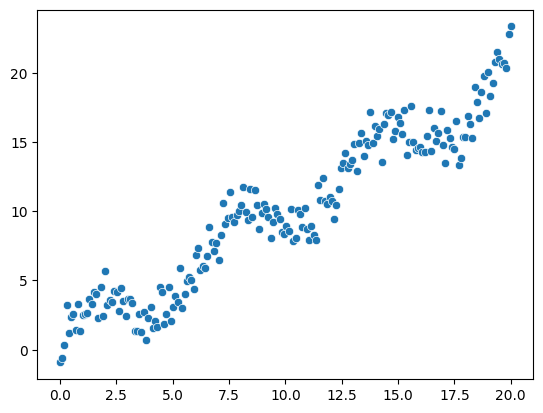

In [4]:
# Crate a 1-dimensional input
X = np.linspace(0, 20, num=200).reshape(-1, 1)
# create an output
y = (X + np.sin(X) * 2 + np.random.normal(size=X.shape)).reshape(-1, 1)
sns.scatterplot(x=X.ravel(), y=y.ravel())

In [5]:
in_features = 1
out_features = 1
model = Sequential([
    Input(shape=(in_features,)),
    Dense(out_features)
])
model.compile(optimizer=SGD(learning_rate=1e-3), loss=MeanSquaredError())
model.fit(X, y, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 68.1446
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 8.9478
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 4.4797
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 3.2749
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 2.8690
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 2.8292
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 3.0803
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 2.9619
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 3.1037
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 3.2346
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 2.8512
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 3.1904
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 3.0446
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0279  
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 3.0765
Epoch 16/20
4/4 ━━━

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


<Axes: >

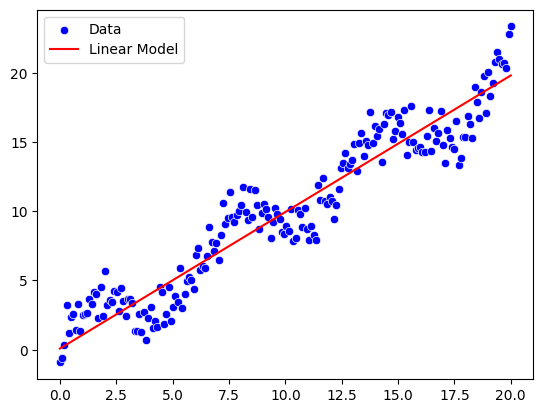

In [6]:
y_pred = model.predict(X)
sns.scatterplot(x=X.ravel(), y=y.ravel(), color="blue", label="Data")  # The data
sns.lineplot(
    x=X.ravel(), y=y_pred.ravel(), color="red", label="Linear Model"
)  # What our model learned

In [7]:
model = Sequential([
    Input(shape=(1,)),
    Dense(10),
    Dense(1)
])
model.compile(optimizer=SGD(learning_rate=1e-3), loss=MeanSquaredError())
model.fit(X, y, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 4.9245
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 3.2028
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 3.0799
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 3.1528
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 3.0869
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 3.1674
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 3.1946
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 3.2103
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 3.2464
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 3.2651
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 3.1227
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 3.0634
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 3.0198
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 3.5028
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 3.2325
Epoch 16/20
4/4 ━━━━

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<Axes: >

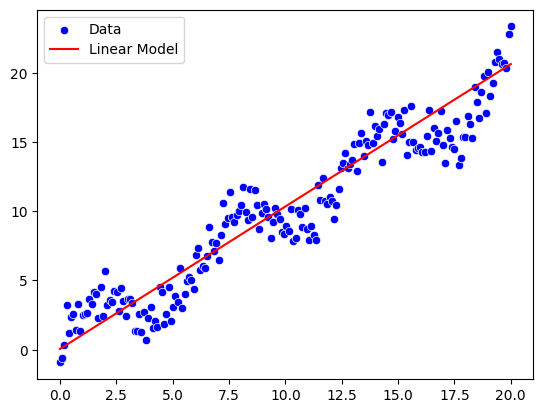

In [8]:
y_pred = model.predict(X)
sns.scatterplot(x=X.ravel(), y=y.ravel(), color="blue", label="Data")  # The data
sns.lineplot(
    x=X.ravel(), y=y_pred.ravel(), color="red", label="Linear Model"
)  # What our model learned

Text(0, 0.5, 'Activation')

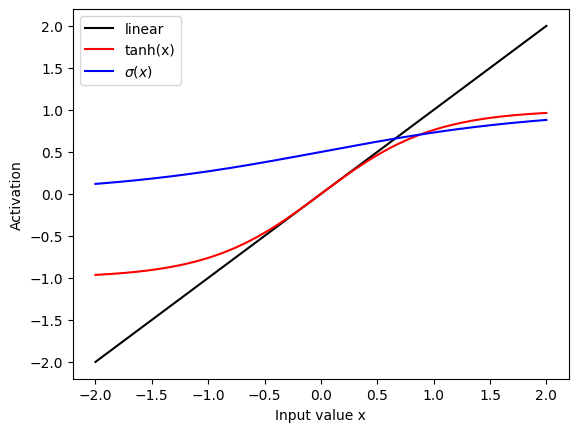

In [9]:
activation_input = np.linspace(-2, 2, num=200)
tanh_activation = np.tanh(activation_input)
sigmoid_activation = np.exp(activation_input) / (np.exp(activation_input) + 1)
sns.lineplot(x=activation_input, y=activation_input, color="black", label="linear")
sns.lineplot(x=activation_input, y=tanh_activation, color="red", label="tanh(x)")
ax = sns.lineplot(
    x=activation_input, y=sigmoid_activation, color="blue", label="$\\sigma(x)$"
)
ax.set_xlabel("Input value x")
ax.set_ylabel("Activation")

In [10]:
model = Sequential([
    Input(shape=(1,)),
    Dense(10, activation="tanh"),
    Dense(1)
])
model.compile(optimizer=RMSprop(learning_rate=1e-2), loss=MeanSquaredError())
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.fit(X, y, epochs=1000)

Epoch 1/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 136.2646
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 87.3122
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 64.7625
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 49.6636
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 41.4141
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 36.8838
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 37.6717
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 29.1639
Epoch 9/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 23.3103
Epoch 10/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 22.0374
Epoch 11/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 18.4883
Epoch 12/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 15.3054
Epoch 13/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - loss: 14.7250
Epoch 14/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 12.9549
Epoch 15/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<Axes: >

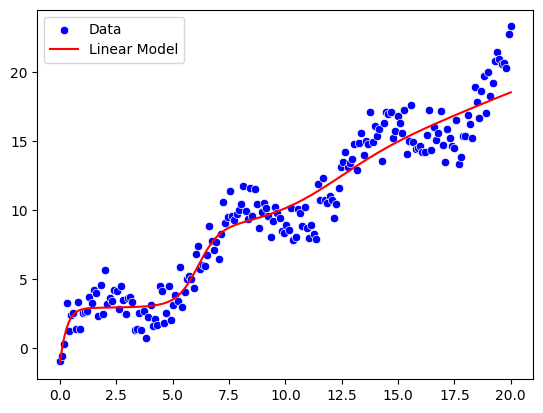

In [12]:
y_pred = model.predict(X)
sns.scatterplot(x=X.ravel(), y=y.ravel(), color="blue", label="Data")  # The data
sns.lineplot(
    x=X.ravel(), y=y_pred.ravel(), color="red", label="Linear Model"
)  # What our model learned

<Axes: >

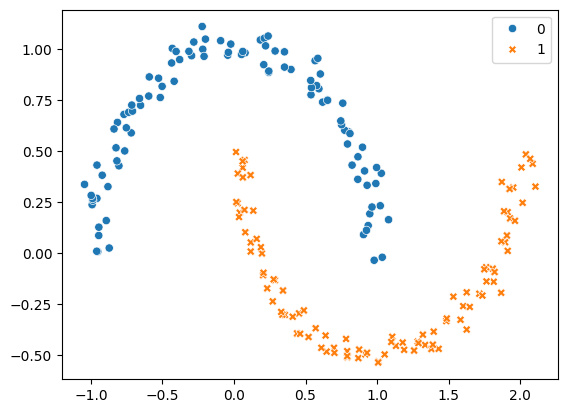

In [13]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y)

In [14]:
print(X.shape, y.shape)

(200, 2) (200,)


In [15]:
model = Sequential([
    Input(shape=(2,)),
    Dense(2, activation="softmax")
])
model.compile(optimizer=SGD(learning_rate=1e-1), loss=SparseCategoricalCrossentropy(from_logits=True))

model.fit(X, y.reshape(-1, 1), epochs=50, verbose=0)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


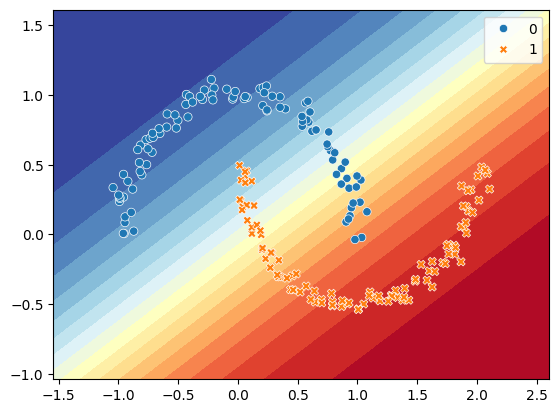

In [16]:
def visualize2DSoftmax(X, y, model, title=None):
    x_min = np.min(X[:, 0]) - 0.5
    x_max = np.max(X[:, 0]) + 0.5
    y_min = np.min(X[:, 1]) - 0.5
    y_max = np.max(X[:, 1]) + 0.5
    xv, yv = np.meshgrid(
        np.linspace(x_min, x_max, num=20),
        np.linspace(y_min, y_max, num=20),
        indexing="ij",
    )
    xy_v = np.hstack((xv.reshape(-1, 1), yv.reshape(-1, 1)))
    y_hat = model.predict(xy_v)
    # with torch.no_grad():
    #     logits = model(torch.tensor(xy_v, dtype=torch.float32))
    #     y_hat = F.softmax(logits, dim=1).numpy()

    cs = plt.contourf(
        xv,
        yv,
        y_hat[:, 0].reshape(20, 20),
        levels=np.linspace(0, 1, num=20),
        cmap=plt.cm.RdYlBu,
    )
    ax = plt.gca()
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, ax=ax)
    if title is not None:
        ax.set_title(title)


visualize2DSoftmax(X, y, model)

In [17]:
model = Sequential([
    Input(shape=(2,)),
    Dense(30, activation="tanh"),
    Dense(30, activation="tanh"),
    Dense(2, activation="softmax")
])
model.compile(optimizer=SGD(learning_rate=1e-1), loss=SparseCategoricalCrossentropy())

model.fit(X, y.reshape(-1, 1), epochs=200, verbose=0)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


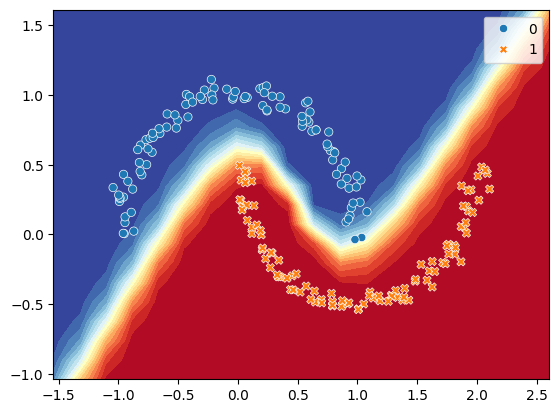

In [18]:
visualize2DSoftmax(X, y, model)

In [19]:
X_train, y_train = make_moons(n_samples=8000, noise=0.4)
X_test, y_test = make_moons(n_samples=200, noise=0.4)

<Axes: >

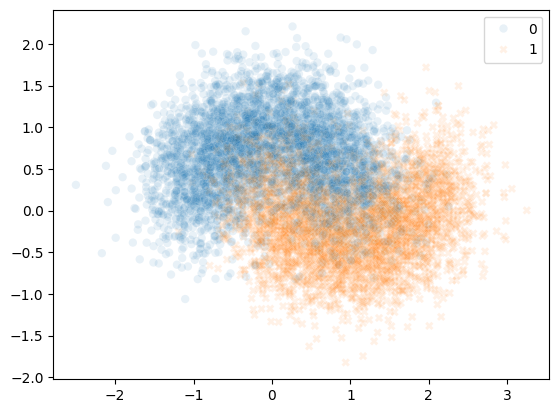

In [20]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, style=y_train, alpha=0.1)

In [21]:
model_new = Sequential([
    Input(shape=(2,)),
    Dense(30, activation="tanh"),
    Dense(30, activation="tanh"),
    Dense(2, activation="softmax")
])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


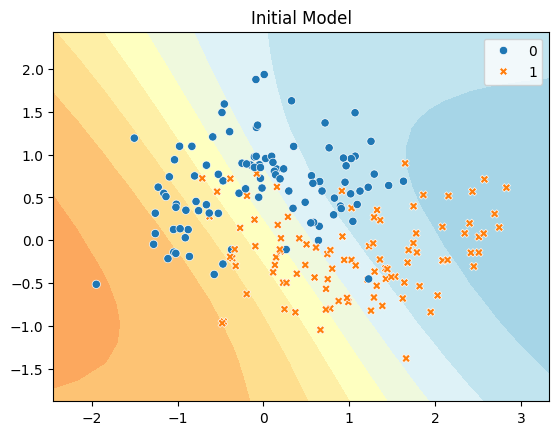

In [22]:
visualize2DSoftmax(X_test, y_test, model_new, title="Initial Model")

In [23]:
model_new.compile(
    optimizer=SGD(learning_rate=1e-3), 
    metrics=[SparseCategoricalAccuracy()],
    loss=SparseCategoricalCrossentropy(from_logits=False)
)
history = model_new.fit(
    X_train, y_train.reshape(-1, 1), 
    validation_data=(X_test, y_test.reshape(-1, 1)),
    epochs=10, verbose=0)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


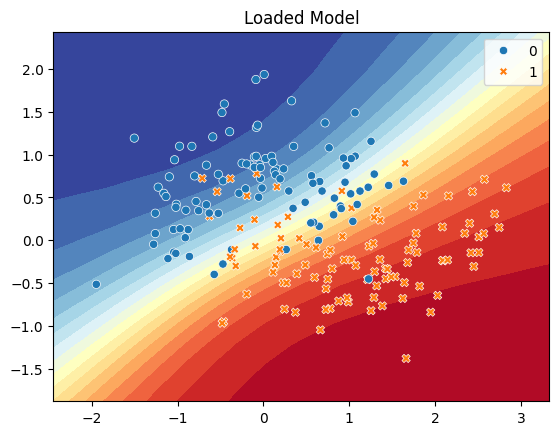

In [24]:
visualize2DSoftmax(X_test, y_test, model_new, title="Loaded Model")

<Axes: >

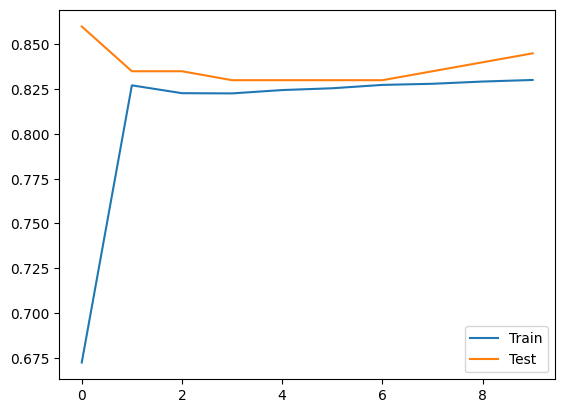

In [25]:
pd.DataFrame({
    "Train": history.history['sparse_categorical_accuracy'],
    "Test": history.history['val_sparse_categorical_accuracy']
}).plot()